In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from  qiime_analysis import *
%matplotlib inline

In [ ]:
!shared_phylotypes.py -i otu_table.biom -o shared_phylo.tsv

In [3]:
phylo = pd.read_csv('./shared_phylo.tsv', sep='\t', index_col=0)
phylo = sort_df(phylo)

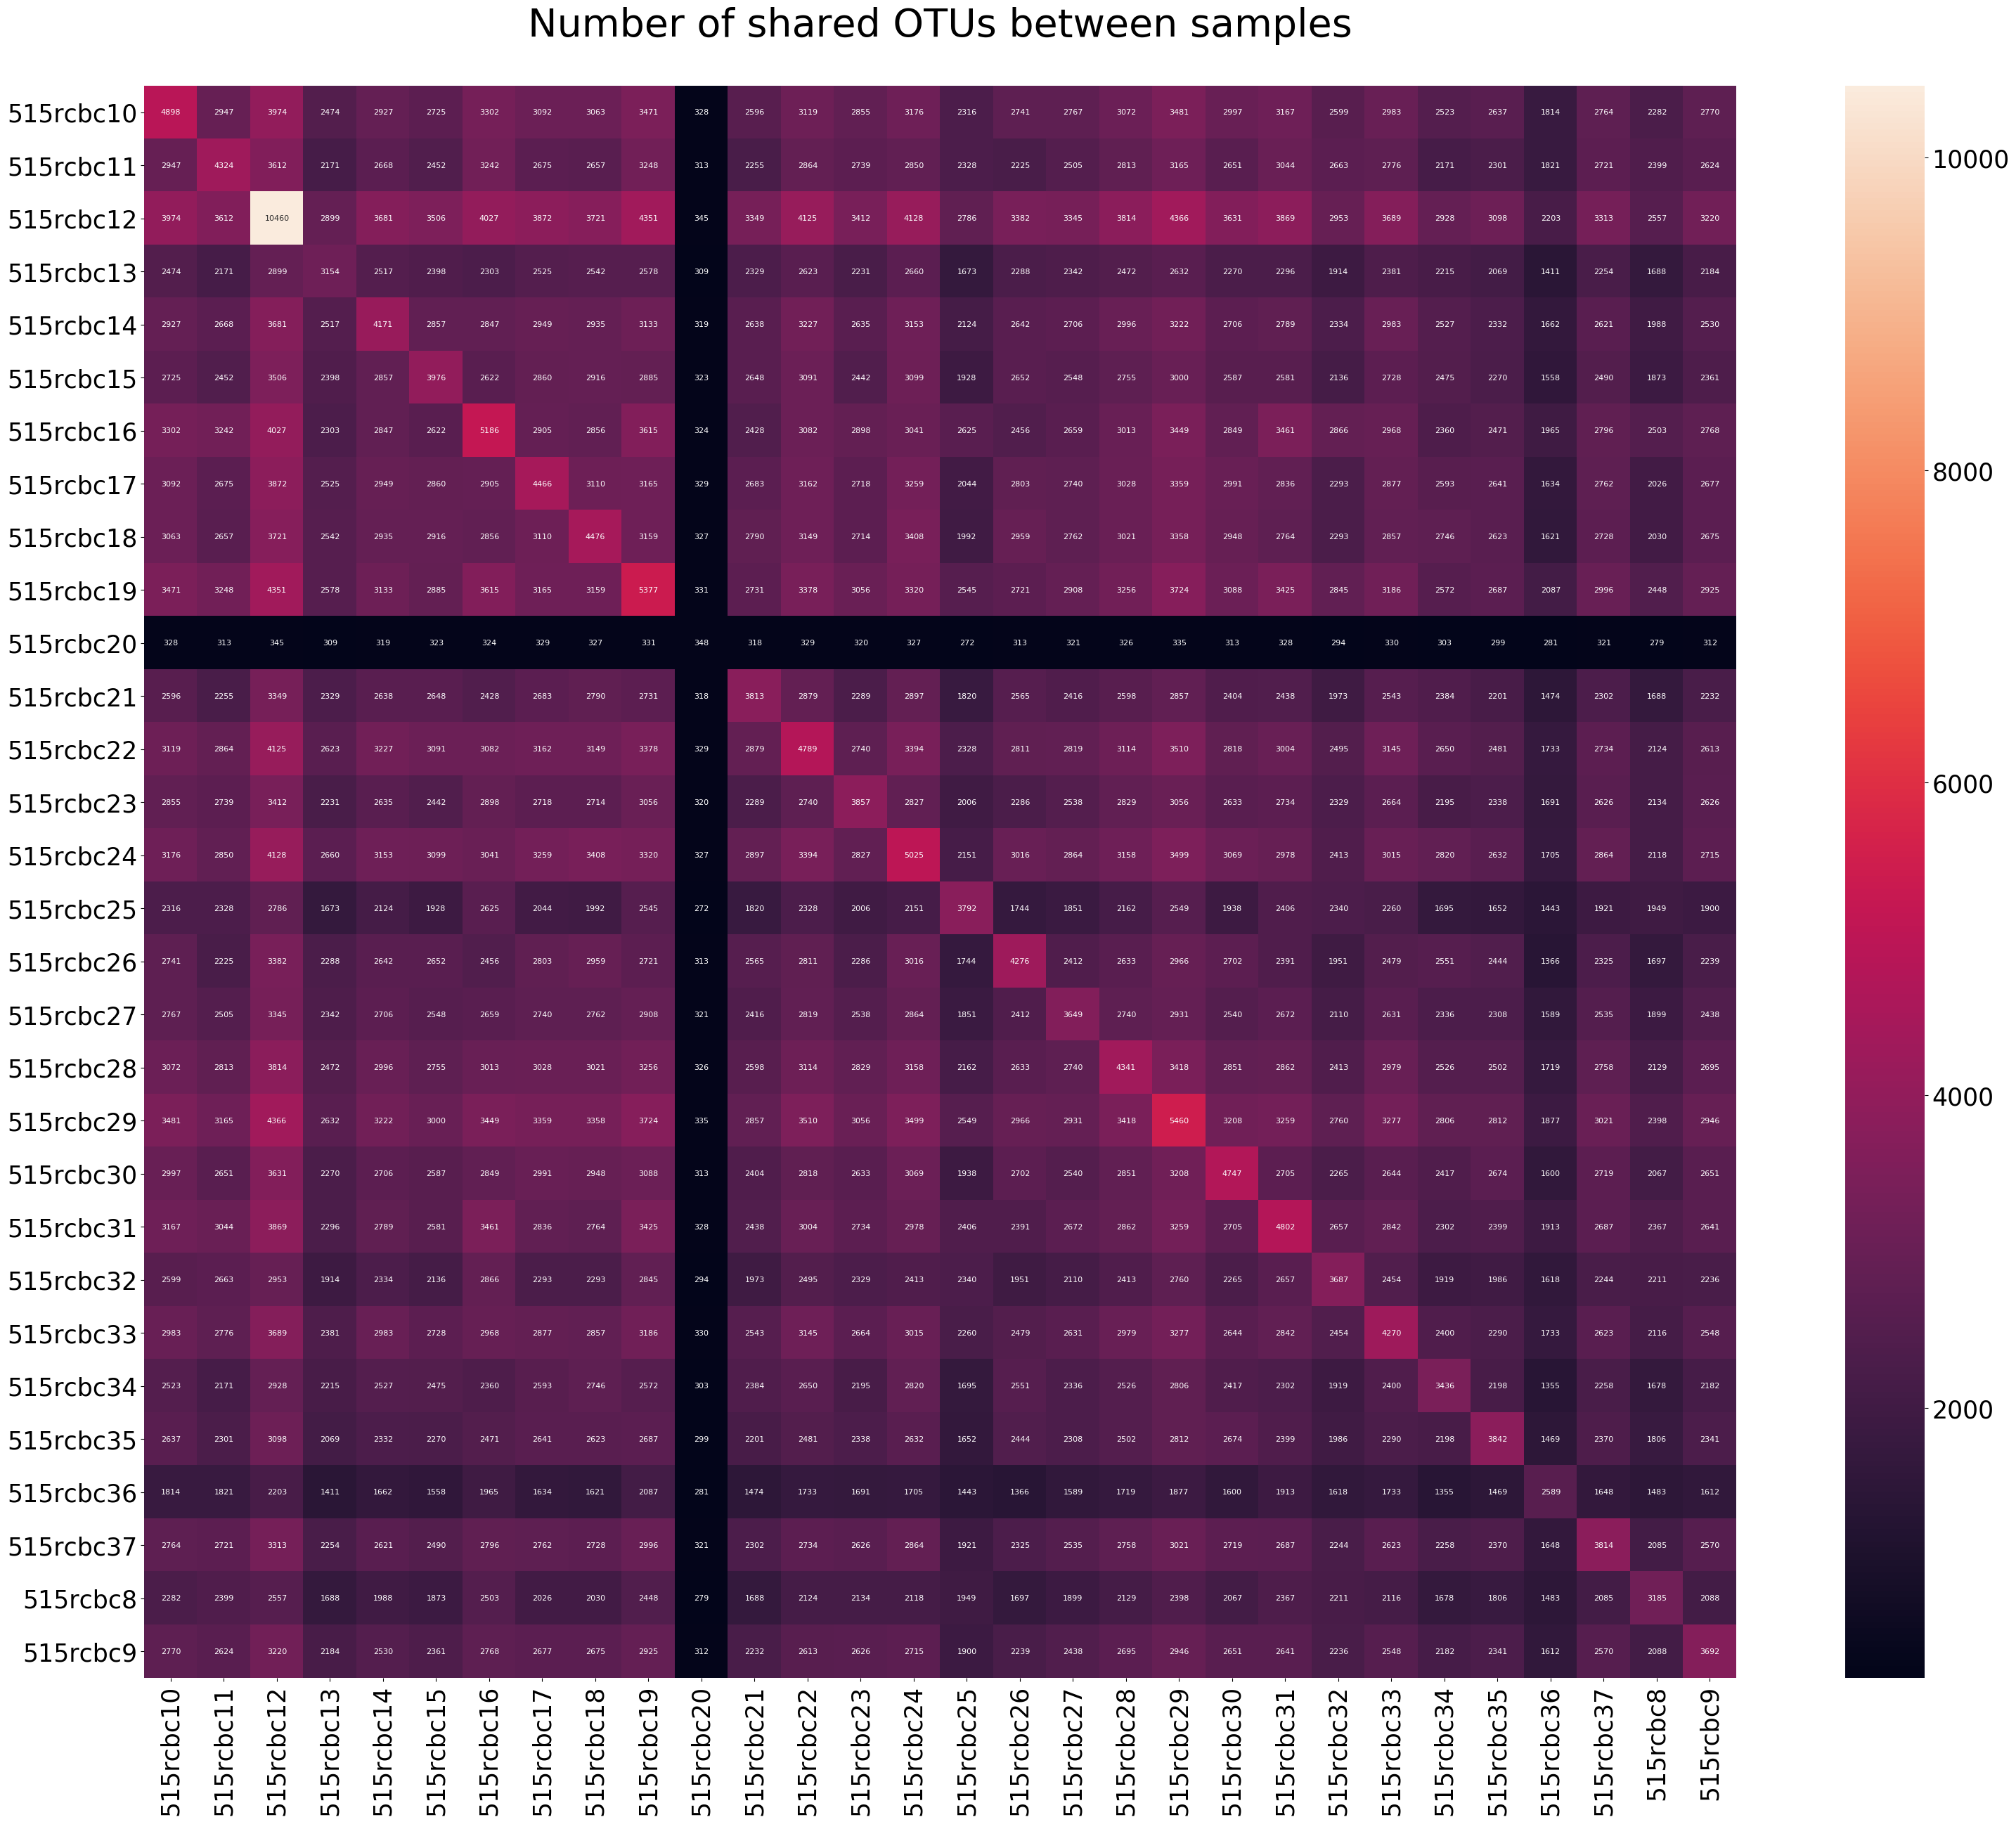

In [4]:
plot_heatmap(phylo, title="Number of shared OTUs between samples\n", 
             savename='./figs/shared_otus.png')

In [ ]:
!alpha_diversity.py \
-i otu_table.biom \
-o alphadiv.tsv \
-t rep_set.tre

In [5]:
alpha = pd.read_csv('./alphadiv.tsv',sep='\t', index_col=0)
alpha = alpha.sort_index()

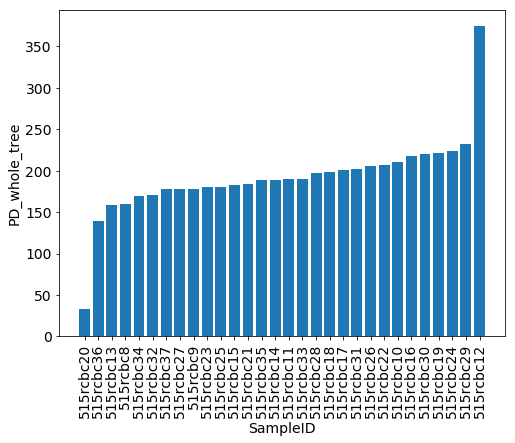

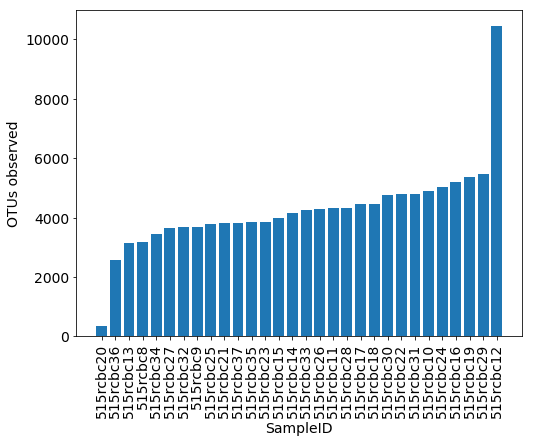

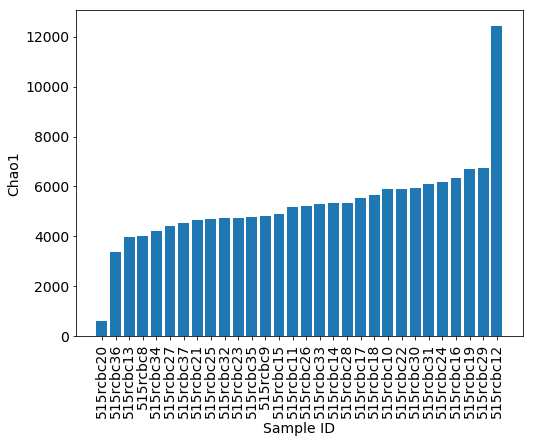

In [6]:
plot_bar(alpha, 'PD_whole_tree', savename='./figs/PD_alpha.png')
plot_bar(alpha, 'observed_otus', savename='./figs/observed_alpha.png', ylabel='OTUs observed')
plot_bar(alpha, 'chao1', savename='./figs/chao1_alpha.pdf', ylabel="Chao1", xlabel='Sample ID')

In [ ]:
!beta_diversity.py \
-i otu_table.biom \
-o beta_diversity \
-m unweighted_unifrac,weighted_unifrac,euclidean \
-t rep_set.tre

In [7]:
beta = pd.read_csv('./beta_diversity/weighted_unifrac_otu_table.txt', sep='\t', index_col=0)
beta = sort_df(beta)

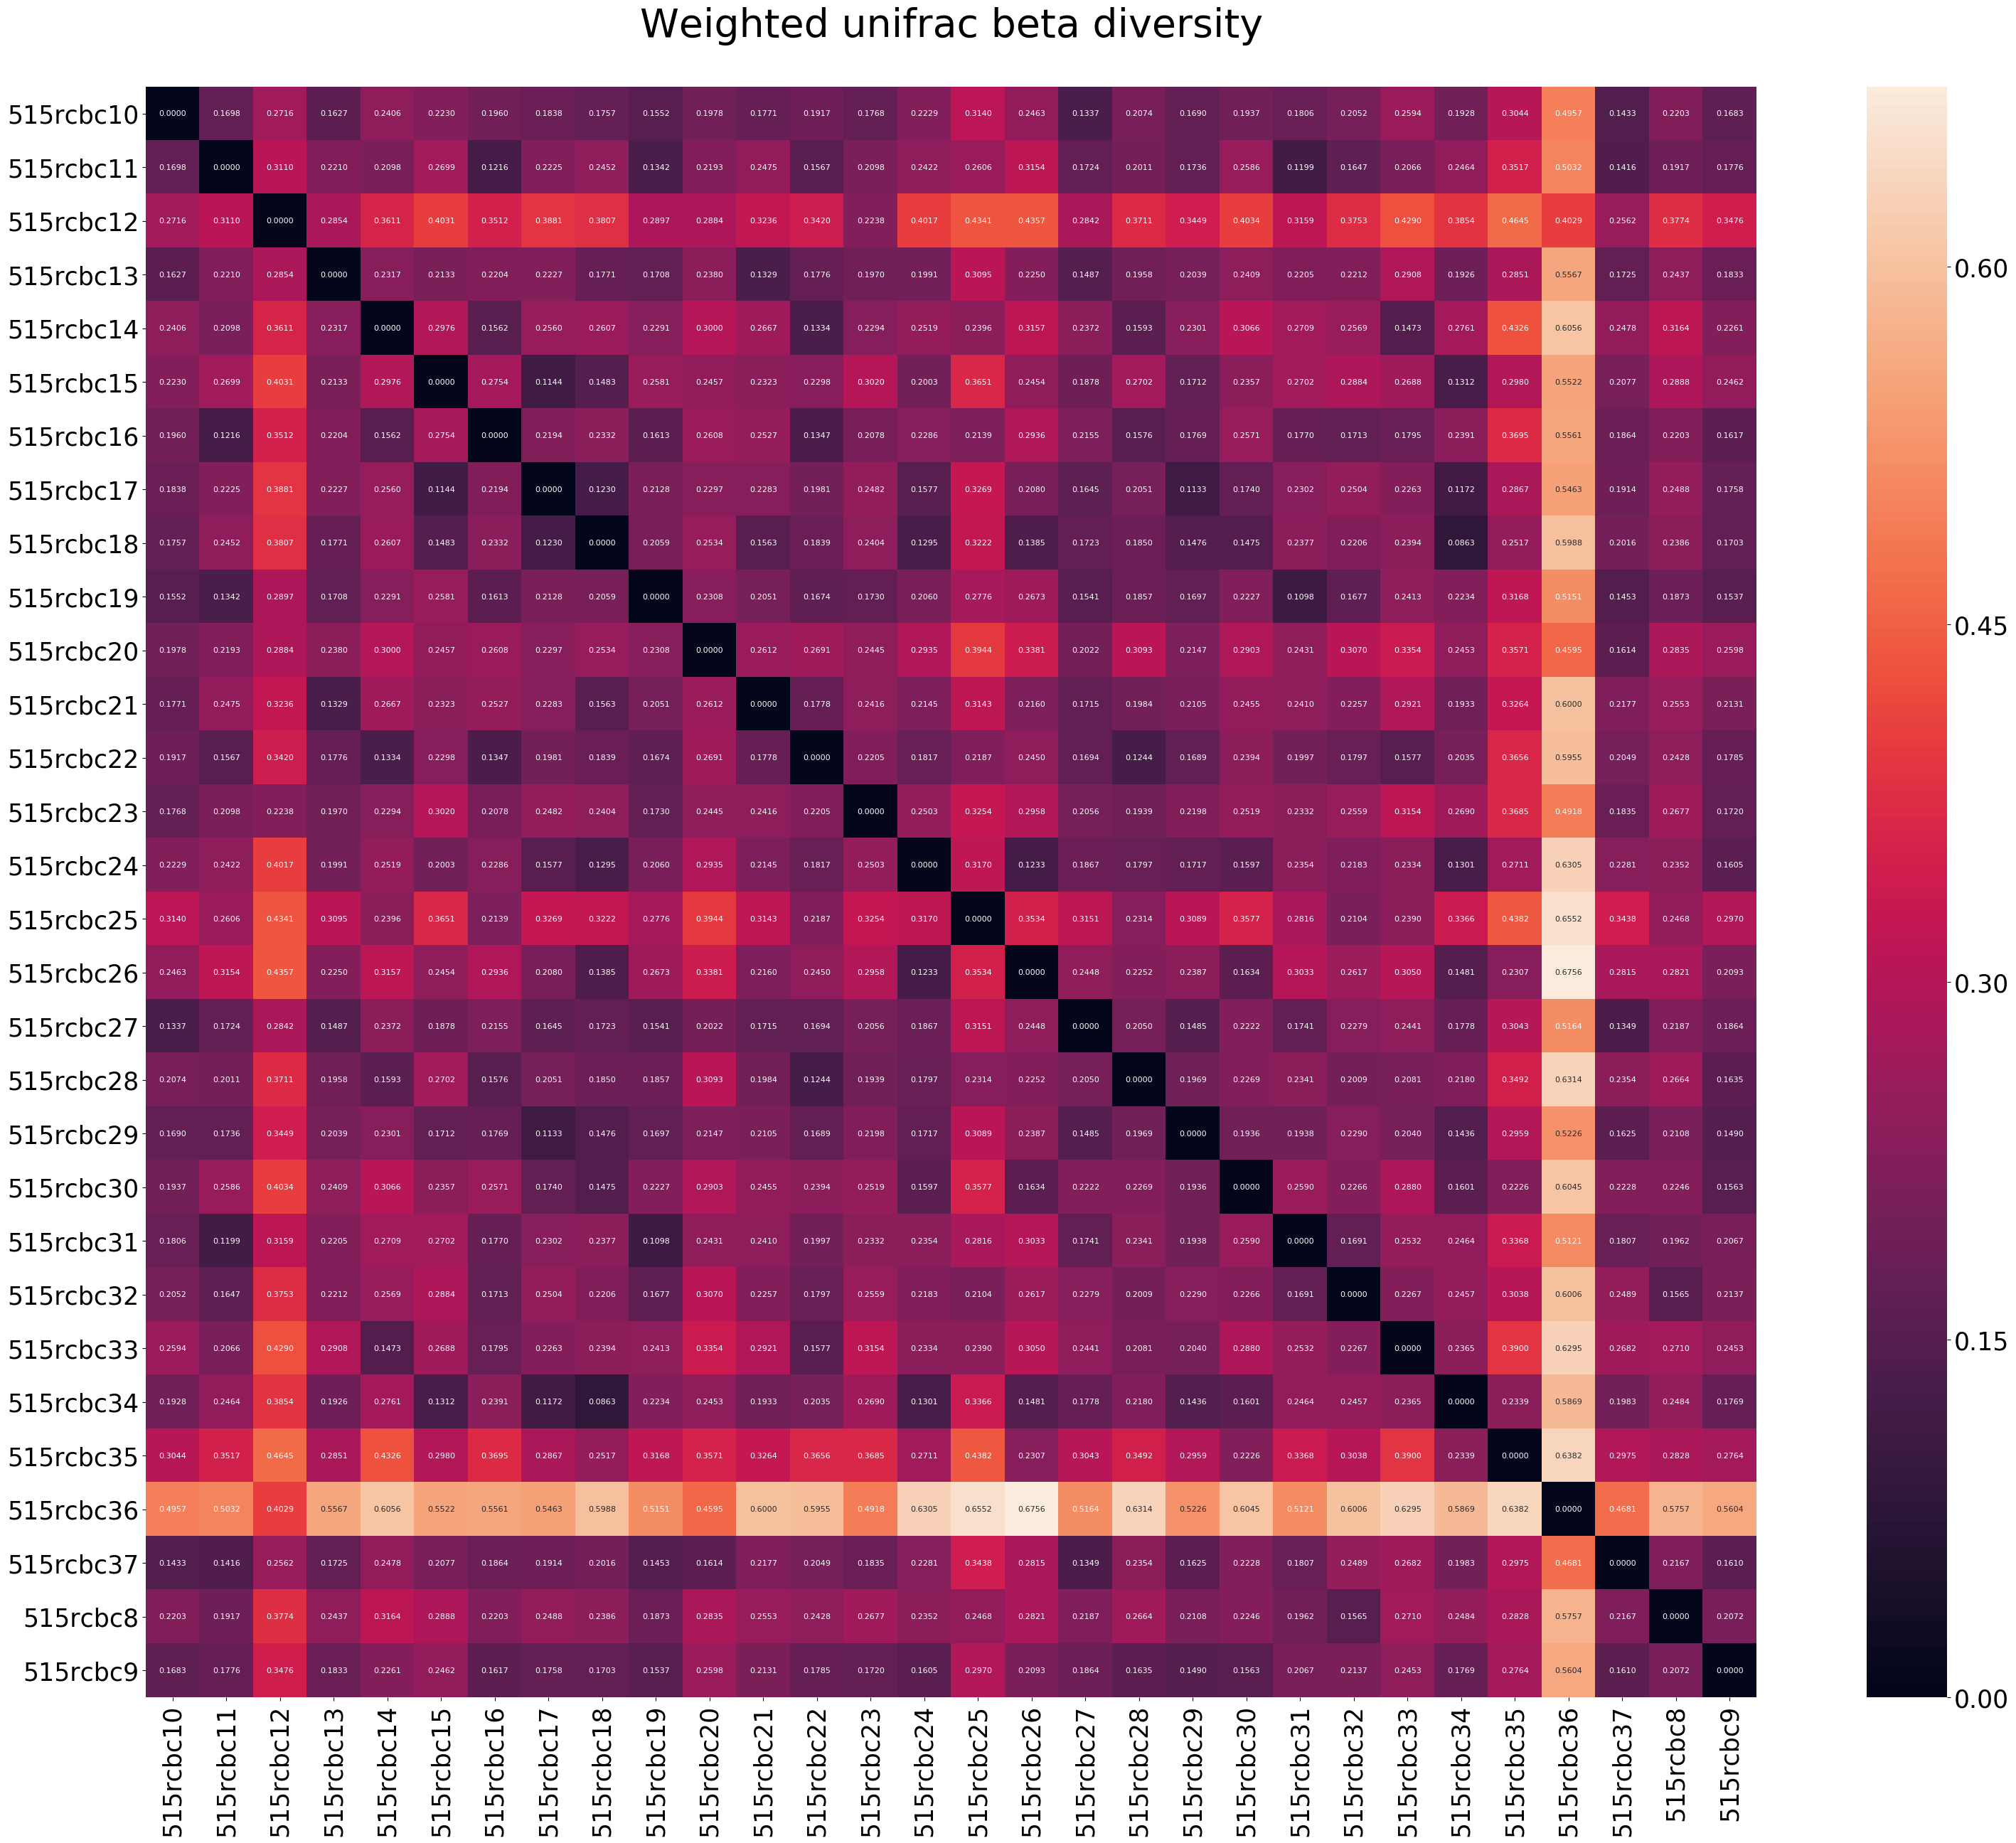

In [8]:
plot_heatmap(beta, fmt='.4f', title='Weighted unifrac beta diversity\n', savename='./figs/weighted_beta.png')

In [9]:
beta_unweight = pd.read_csv('./beta_diversity/weighted_unifrac_otu_table.txt', sep='\t', index_col=0)
# beta_unweight = sort_df(beta_unweight)

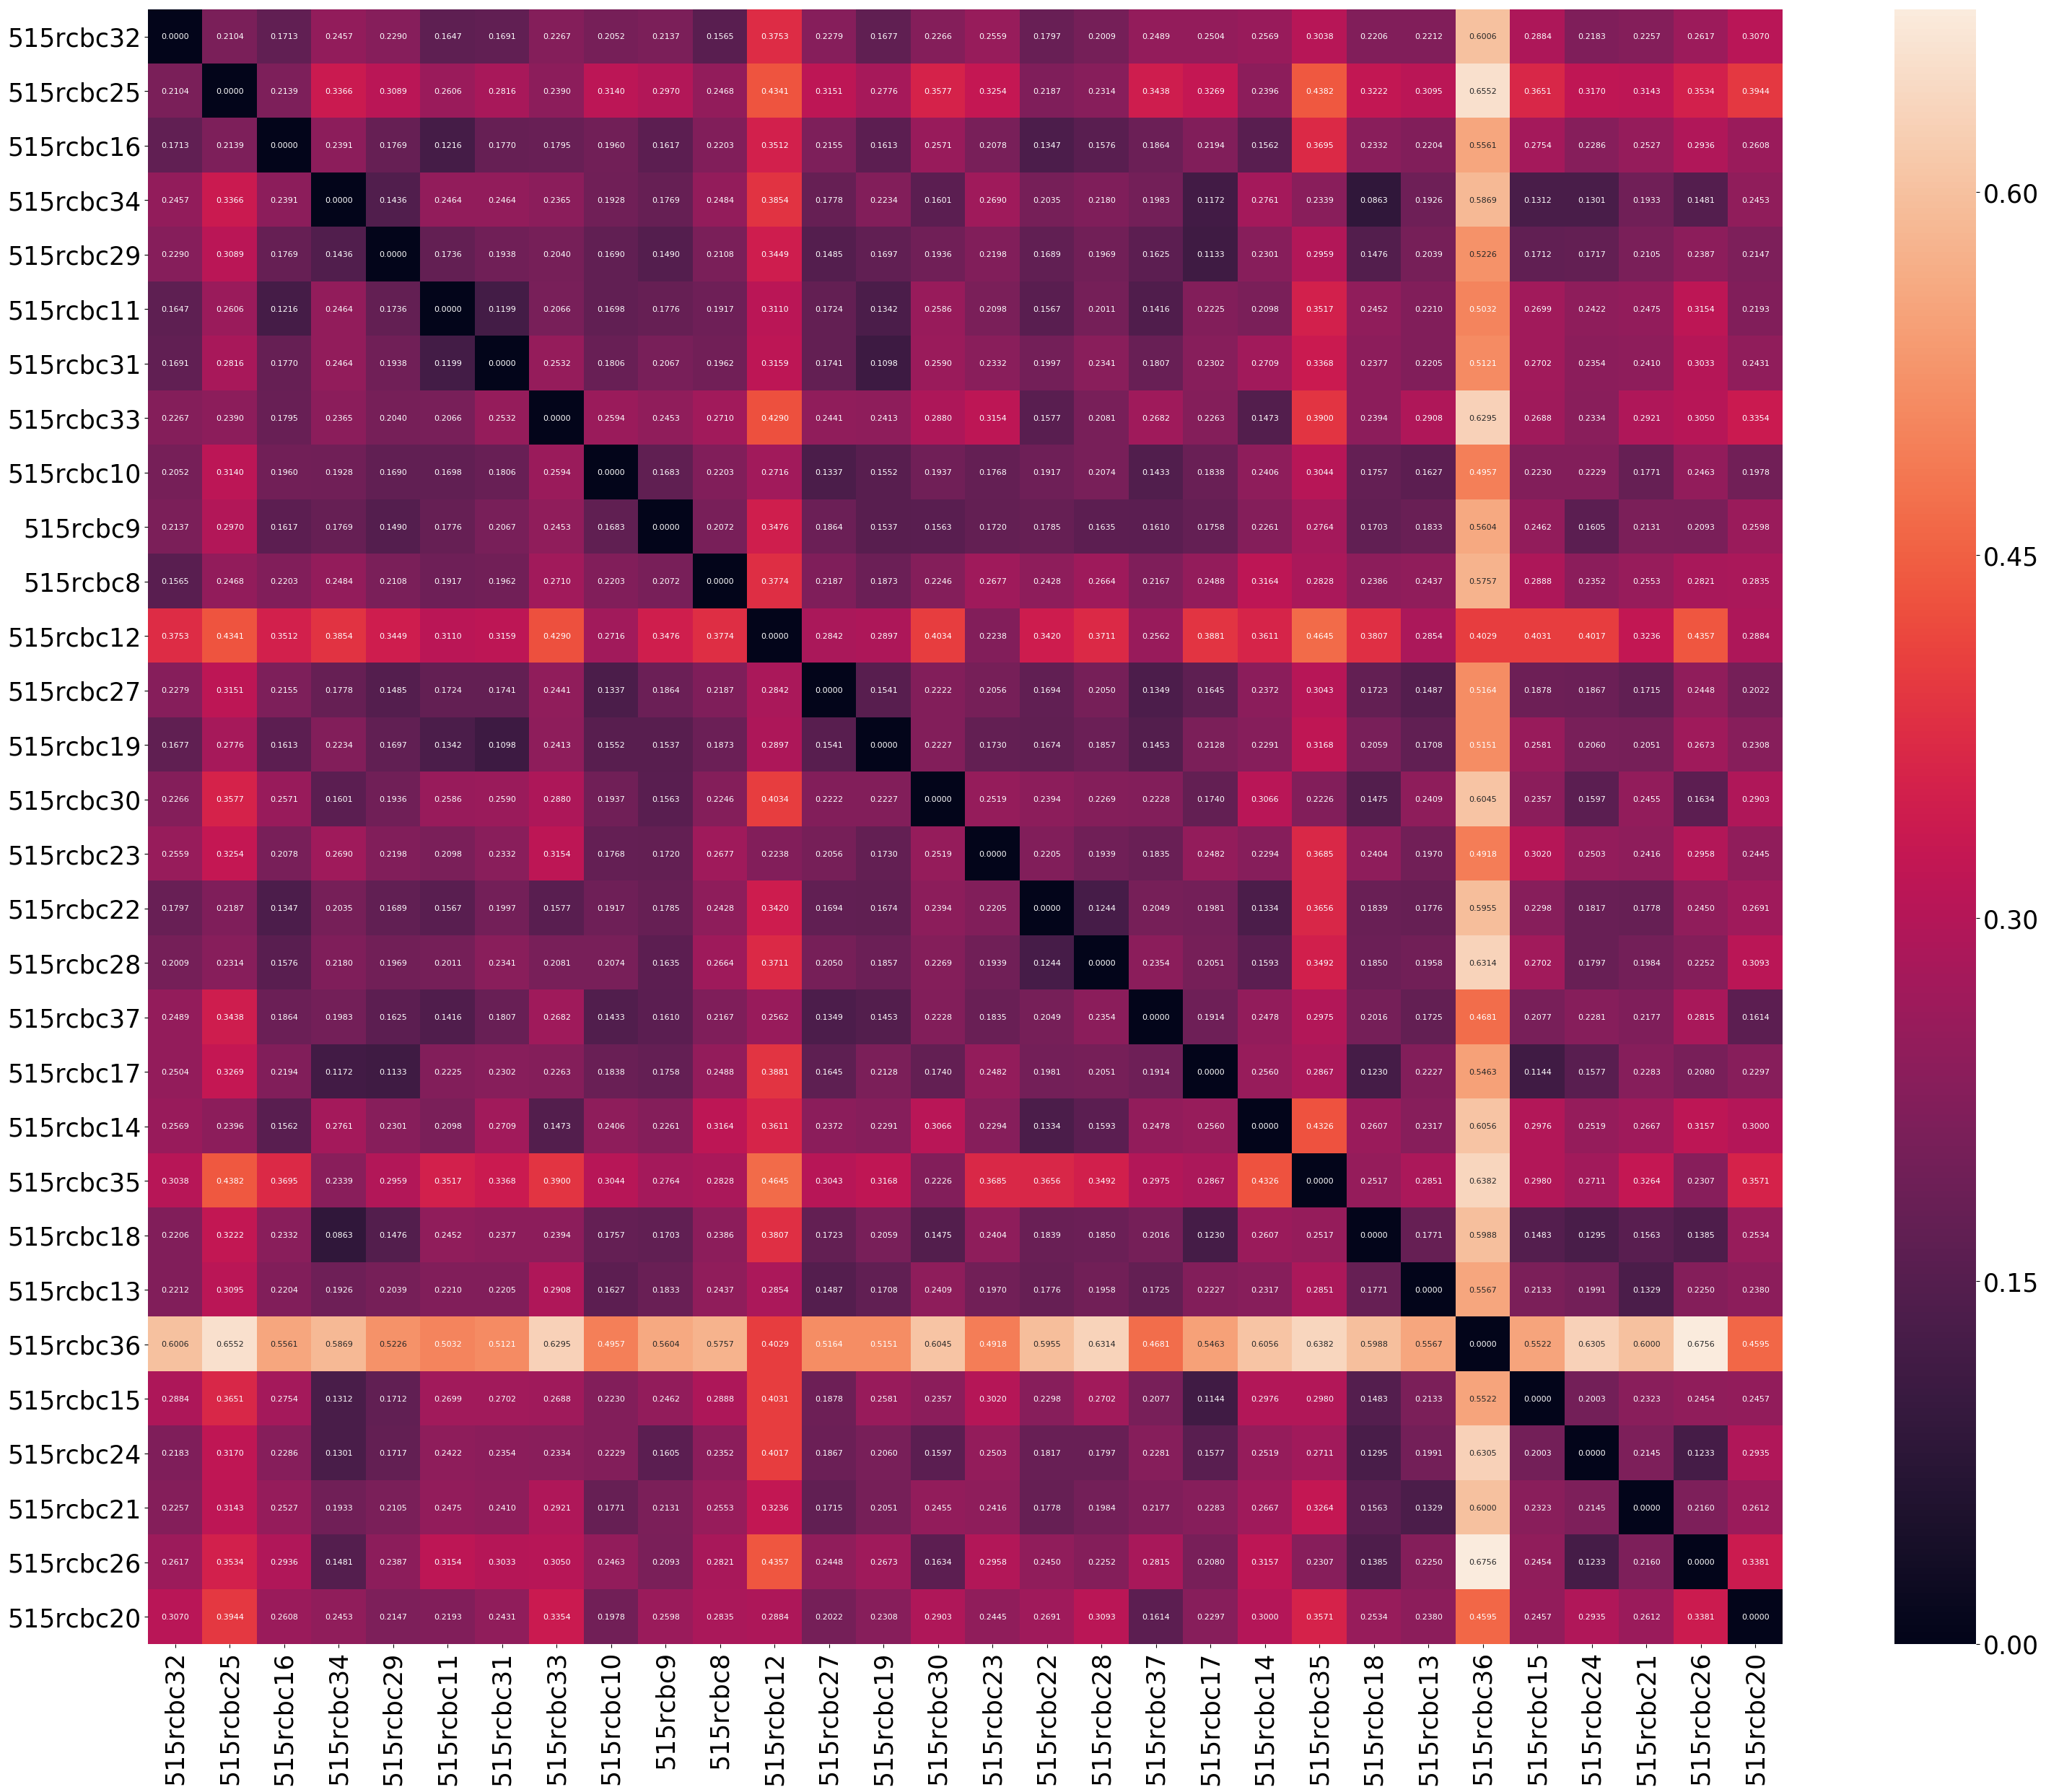

In [10]:
plot_heatmap(beta_unweight, fmt='.4f', savename='./figs/unweighted_beta.png')

In [11]:
eucl = pd.read_csv('./beta_diversity/euclidean_otu_table.txt', sep='\t', index_col=0)
eucl = sort_df(eucl)

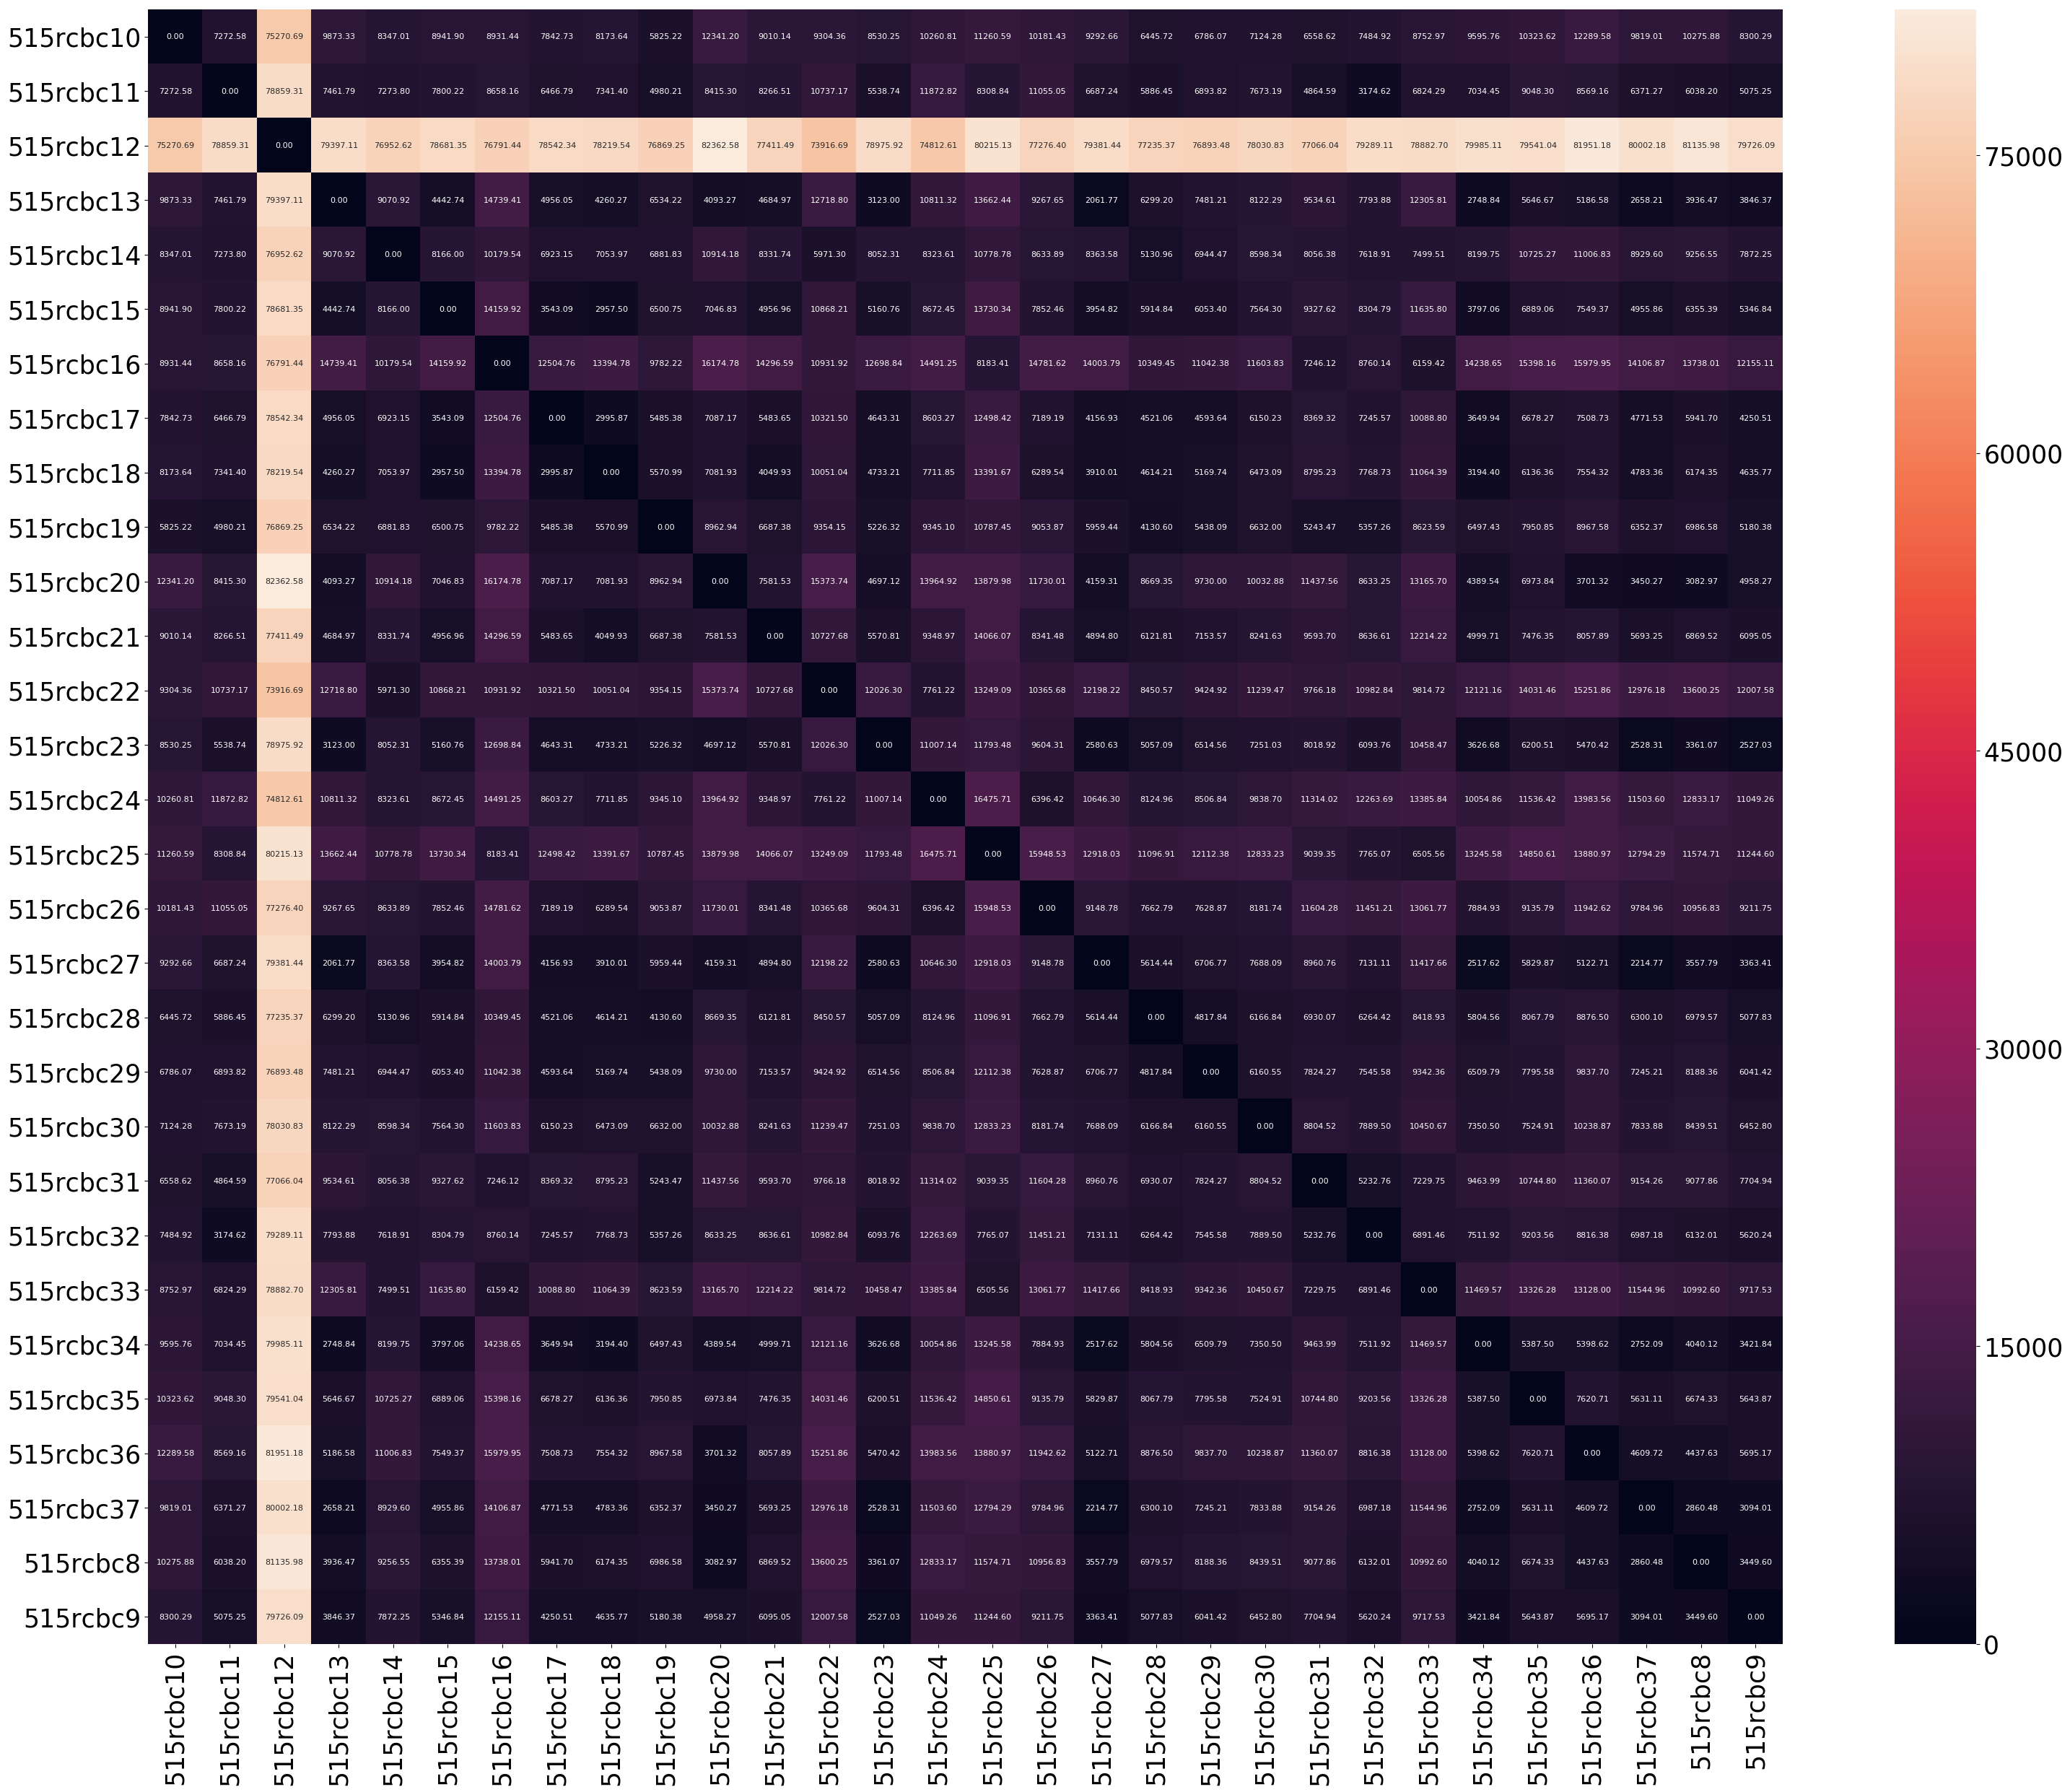

In [12]:
plot_heatmap(eucl, fmt='.2f', savename='./figs/eucl_beta.png')

In [ ]:
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_pearson.tsv \
-m map.tsv \
-c SamplePh \
-s pearson
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_spearman.tsv \
-m map.tsv \
-c SamplePh \
-s spearman
!observation_metadata_correlation.py \
-i otu_table.biom \
-o ./metadata_correlation/metadata_correlation_ph_kendall.tsv \
-m map.tsv \
-c SamplePh \
-s kendall

In [13]:
pears = pd.read_csv('./metadata_correlation/metadata_correlation_ph_pearson.tsv',sep='\t',index_col=0)
spear = pd.read_csv('./metadata_correlation/metadata_correlation_ph_spearman.tsv',sep='\t',index_col=0)
kend = pd.read_csv('./metadata_correlation/metadata_correlation_ph_kendall.tsv',sep='\t',index_col=0)
taxon = pears.taxonomy
pears.columns = pears.columns + '_pears'
spear.columns = spear.columns + '_spear'
kend.columns = kend.columns + '_kend'
correl = pd.concat([pears,spear,kend], axis=1)
correl = correl[correl.columns.drop(list(correl.filter(regex='taxonomy')))]
correl = pd.concat([correl, taxon], axis=1)
correl['pval_mean'] = correl[['pval_pears', 'pval_spear','pval_kend']].mean(axis=1)
correl['pval_fdr_mean'] = correl[['pval_fdr_pears', 'pval_fdr_spear','pval_fdr_kend']].mean(axis=1)
correl['pval_bon_mean'] = correl[['pval_bon_pears', 'pval_bon_spear','pval_bon_kend']].mean(axis=1)
correl

,Test stat._pears,pval_pears,pval_fdr_pears,pval_bon_pears,Test stat._spear,pval_spear,pval_fdr_spear,pval_bon_spear,Test stat._kend,pval_kend,pval_fdr_kend,pval_bon_kend,taxonomy,pval_mean,pval_fdr_mean,pval_bon_mean
AACY020170354.114.1617,-0.157178,0.410198,0.712206,1.0,-0.000343,0.998578,1.000000,1.0,-0.010287,0.957370,1.000000,1.0,D_0__Bacteria; D_1__Bacteroidetes; D_2__Bacter...,0.788715,0.904069,1.0
AACY020170993.10.1544,-0.128219,0.502900,0.734899,1.0,0.007032,0.970850,1.000000,1.0,0.015992,0.933768,1.000000,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.802506,0.911633,1.0
AAEW02000008.189409.190966,-0.054421,0.777133,0.889285,1.0,0.088384,0.645188,0.917092,1.0,0.061780,0.747887,0.988290,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.723403,0.931556,1.0
AAMD01000099.28240.29766,-0.073216,0.703111,0.841441,1.0,0.032727,0.864920,0.975197,1.0,0.025649,0.893950,1.000000,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.820660,0.938879,1.0
AANZ01000021.102759.104249,0.218891,0.247641,0.712206,1.0,0.230992,0.221583,0.907807,1.0,0.205527,0.278640,0.980950,1.0,D_0__Bacteria; D_1__Planctomycetes; D_2__Planc...,0.249288,0.866988,1.0
AATN01001290.251.1721,-0.051999,0.786825,0.889285,1.0,0.077751,0.685609,0.919364,1.0,0.072616,0.705439,0.980950,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...,0.725958,0.929867,1.0
AATO01000250.4290.5782,-0.156657,0.411775,0.712206,1.0,-0.109996,0.566049,0.907807,1.0,-0.097870,0.609925,0.980950,1.0,D_0__Bacteria; D_1__Bacteroidetes; D_2__Bacter...,0.529250,0.866988,1.0
AATU01012341.11185.12673,-0.049358,0.797427,0.889285,1.0,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,1.0,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...,0.932476,0.963095,1.0
AAWL01000016.11005.12605,-0.210307,0.267284,0.712206,1.0,-0.241992,0.199536,0.907807,1.0,-0.215314,0.255709,0.980950,1.0,D_0__Bacteria; D_1__Firmicutes; D_2__Negativic...,0.240843,0.866988,1.0
AAXU02000001.1612715.1614224,-0.156657,0.411775,0.712206,1.0,-0.109996,0.566049,0.907807,1.0,-0.097870,0.609925,0.980950,1.0,D_0__Bacteria; D_1__Bacteroidetes; D_2__Bacter...,0.529250,0.866988,1.0


In [14]:
correl[['taxonomy', 'pval_mean', 'pval_fdr_mean', 'pval_bon_mean', 'Test stat._pears', 'Test stat._spear', 'Test stat._kend']].sort_values('pval_mean')

,taxonomy,pval_mean,pval_fdr_mean,pval_bon_mean,Test stat._pears,Test stat._spear,Test stat._kend
HM187283.1.1511,D_0__Bacteria; D_1__Planctomycetes; D_2__Pla4 ...,0.001630,0.866988,1.0,0.591937,0.588403,0.503063
KY190578.1.1416,D_0__Bacteria; D_1__Chloroflexi; D_2__Dehaloco...,0.004708,0.866988,1.0,0.556820,0.533620,0.453479
FPLL01004497.15.1491,D_0__Bacteria; D_1__Chloroflexi; D_2__TK10; Am...,0.006157,0.866988,1.0,0.508848,0.539592,0.443743
AF293012.1.1505,D_0__Bacteria; D_1__Nitrospirae; D_2__Nitrospi...,0.007717,0.866988,1.0,0.444942,0.589011,0.459913
MEVL01000015.4457.6018,D_0__Bacteria; D_1__Verrucomicrobia; D_2__Verr...,0.008646,0.866988,1.0,0.410136,0.619896,0.528977
HQ190564.1.1509,D_0__Bacteria; D_1__Proteobacteria; D_2__Gamma...,0.009696,0.866988,1.0,0.459195,0.518119,0.431930
EU335205.1.1524,D_0__Bacteria; D_1__Proteobacteria; D_2__Delta...,0.010136,0.866988,1.0,0.435880,0.570983,0.438772
EU135415.1.1315,D_0__Bacteria; D_1__Verrucomicrobia; D_2__Verr...,0.011417,0.866988,1.0,0.475033,0.530827,0.406817
JQ428743.1.1452,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...,0.012031,0.866988,1.0,0.527848,0.504746,0.395092
EF559008.1.1441,D_0__Bacteria; D_1__Firmicutes; D_2__Clostridi...,0.013022,0.866988,1.0,0.433322,0.486975,0.427992


In [ ]:
!validate_mapping_file.py -m filtered_emp_map.tsv -o map_valid

In [ ]:
!filter_samples_from_otu_table.py \
-i result.biom \
-o filtered_emp.biom \
--sample_id_fp filtered_emp_map_corrected.tsv

In [ ]:
!observation_metadata_correlation.py \
-i filtered_emp.biom \
-o ./metadata_correlation/emp_pearson.tsv \
-m filtered_emp_map_corrected.tsv \
-c ph \
-s pearson

In [3]:
emp_correl = pd.read_csv('./metadata_correlation/emp_pearson.tsv', sep='\t', index_col=0)
emp_correl.dropna(inplace=True)
emp_correl.sort_values('Test stat.')

,Test stat.,pval,pval_fdr,pval_bon,taxonomy
Feature ID,,,,,
EF019749.1.1332,-0.394033,1.948350e-28,8.026433e-27,5.281393e-24,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...
JQ428511.1.1442,-0.370761,4.804146e-25,1.976115e-23,1.302260e-20,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...
HM277716.1.1321,-0.367290,1.454120e-24,5.972246e-23,3.941682e-20,D_0__Bacteria; D_1__Acidobacteria; D_2__Acidob...
JQ428508.1.1441,-0.365744,2.369714e-24,9.717980e-23,6.423585e-20,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...
EF018792.1.1334,-0.364982,3.012272e-24,1.233439e-22,8.165365e-20,D_0__Bacteria; D_1__Proteobacteria; D_2__Alpha...
DQ451491.1.1510,-0.358469,2.272875e-23,9.292734e-22,6.161083e-19,D_0__Bacteria; D_1__Acidobacteria; D_2__Acidob...
EF516814.1.1414,-0.354596,7.384130e-23,3.014482e-21,2.001616e-18,D_0__Bacteria; D_1__Proteobacteria; D_2__Gamma...
EF019473.1.1401,-0.348824,4.138405e-22,1.686913e-20,1.121797e-17,D_0__Bacteria; D_1__Verrucomicrobia; D_2__Spar...
EU773331.1.1410,-0.347642,5.861933e-22,2.385877e-20,1.588994e-17,D_0__Bacteria; D_1__Firmicutes; D_2__Bacilli; ...
